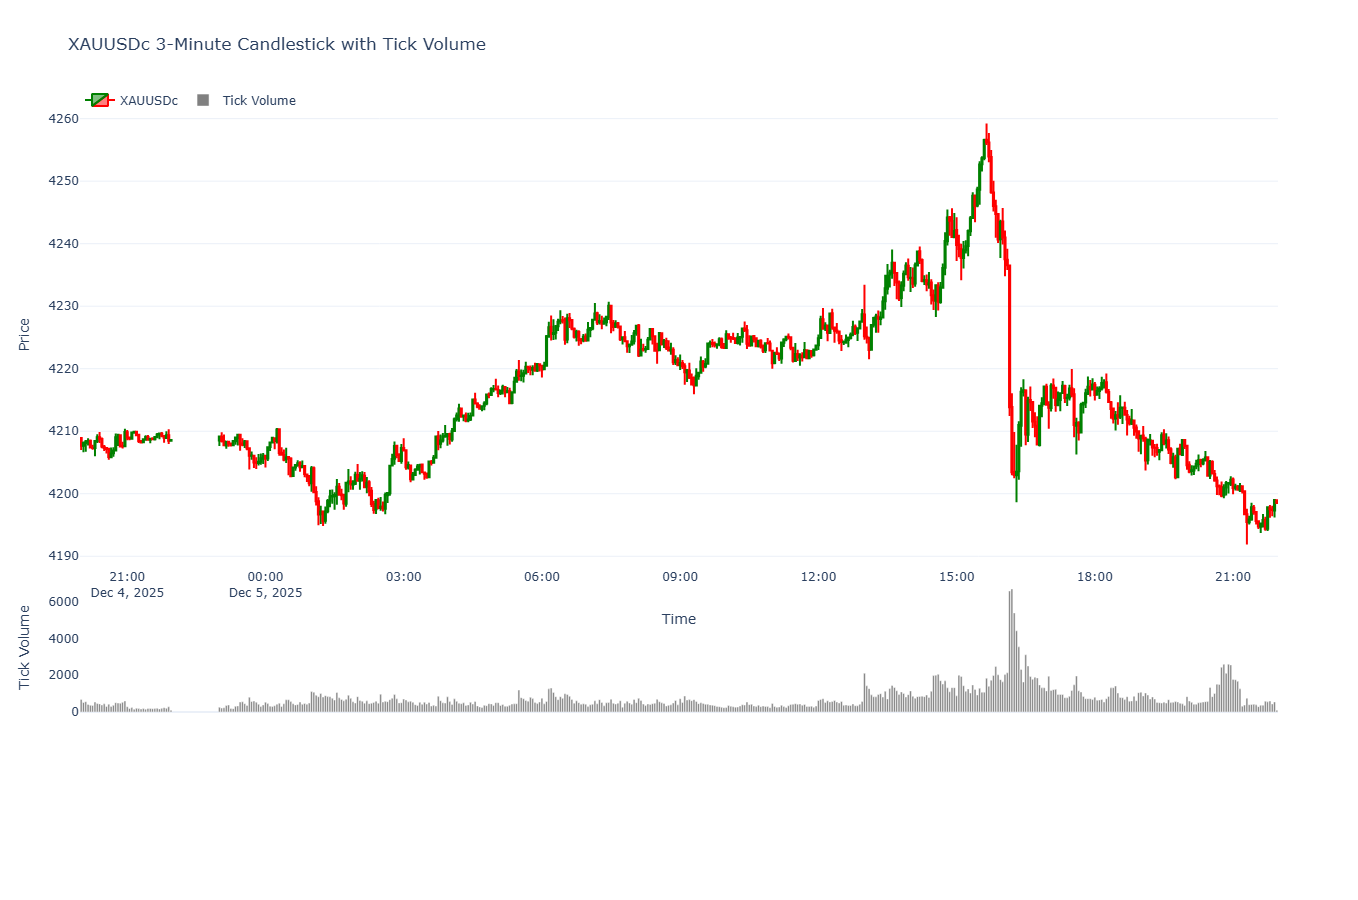

In [3]:
import MetaTrader5 as mt5 
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=5)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

# -------------------------
# 4. Remove non-trading periods (weekends)
# -------------------------
df = df[df.index.dayofweek < 5]

# -------------------------
# 5. Plot 3-pane chart (NO HIGHLIGHTS)
# -------------------------
fig = go.Figure()

# Candlestick chart (top pane)
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Tick-volume bars (middle pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['tick_volume'],
    name='Tick Volume',
    marker_color='gray',
    yaxis='y2'
))

# Layout
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc 3-Minute Candlestick with Tick Volume',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),
    yaxis=dict(title='Price', domain=[0.35, 1]),
    yaxis2=dict(title='Tick Volume', domain=[0.15, 0.33], showgrid=False),
    legend=dict(orientation='h', y=1.02, x=0),
    height=900
)

fig.show()


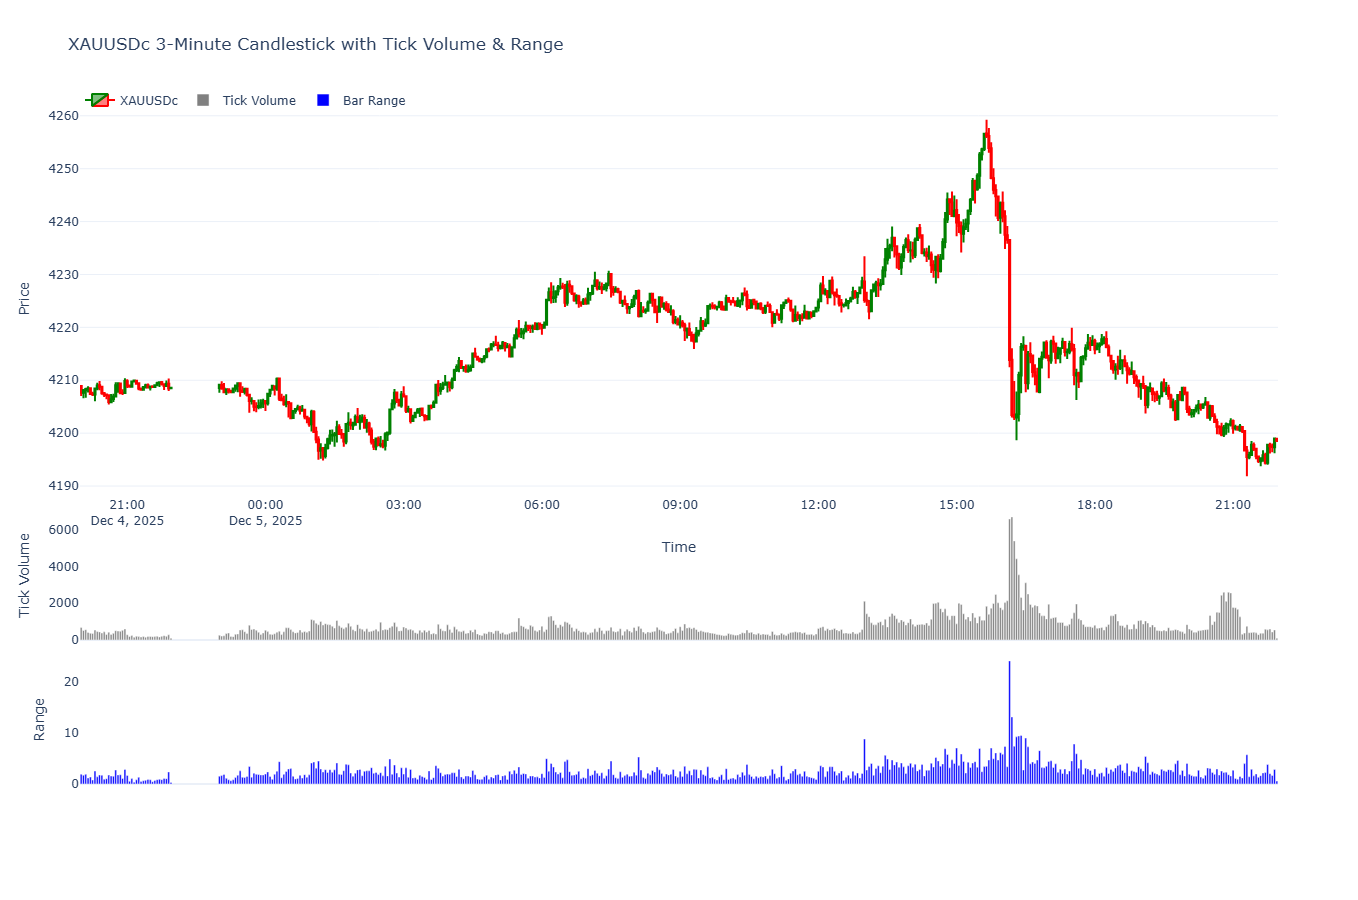

In [4]:
import MetaTrader5 as mt5 
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=5)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

# -------------------------
# 4. Remove non-trading periods (weekends)
# -------------------------
df = df[df.index.dayofweek < 5]

# -------------------------
# 5. Calculate Range per bar
# -------------------------
df['range'] = df['high'] - df['low']

# -------------------------
# 6. Plot 3-pane chart
# -------------------------
fig = go.Figure()

# Candlestick chart (top pane)
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Tick-volume bars (middle pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['tick_volume'],
    name='Tick Volume',
    marker_color='gray',
    yaxis='y2'
))

# Range bars (bottom pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['range'],
    name='Bar Range',
    marker_color='blue',
    yaxis='y3'
))

# Layout with 3 panes
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc 3-Minute Candlestick with Tick Volume & Range',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),
    yaxis=dict(title='Price', domain=[0.45, 1]),
    yaxis2=dict(title='Tick Volume', domain=[0.25, 0.43], showgrid=False),
    yaxis3=dict(title='Range', domain=[0.05, 0.23], showgrid=False),
    legend=dict(orientation='h', y=1.02, x=0),
    height=900
)

fig.show()


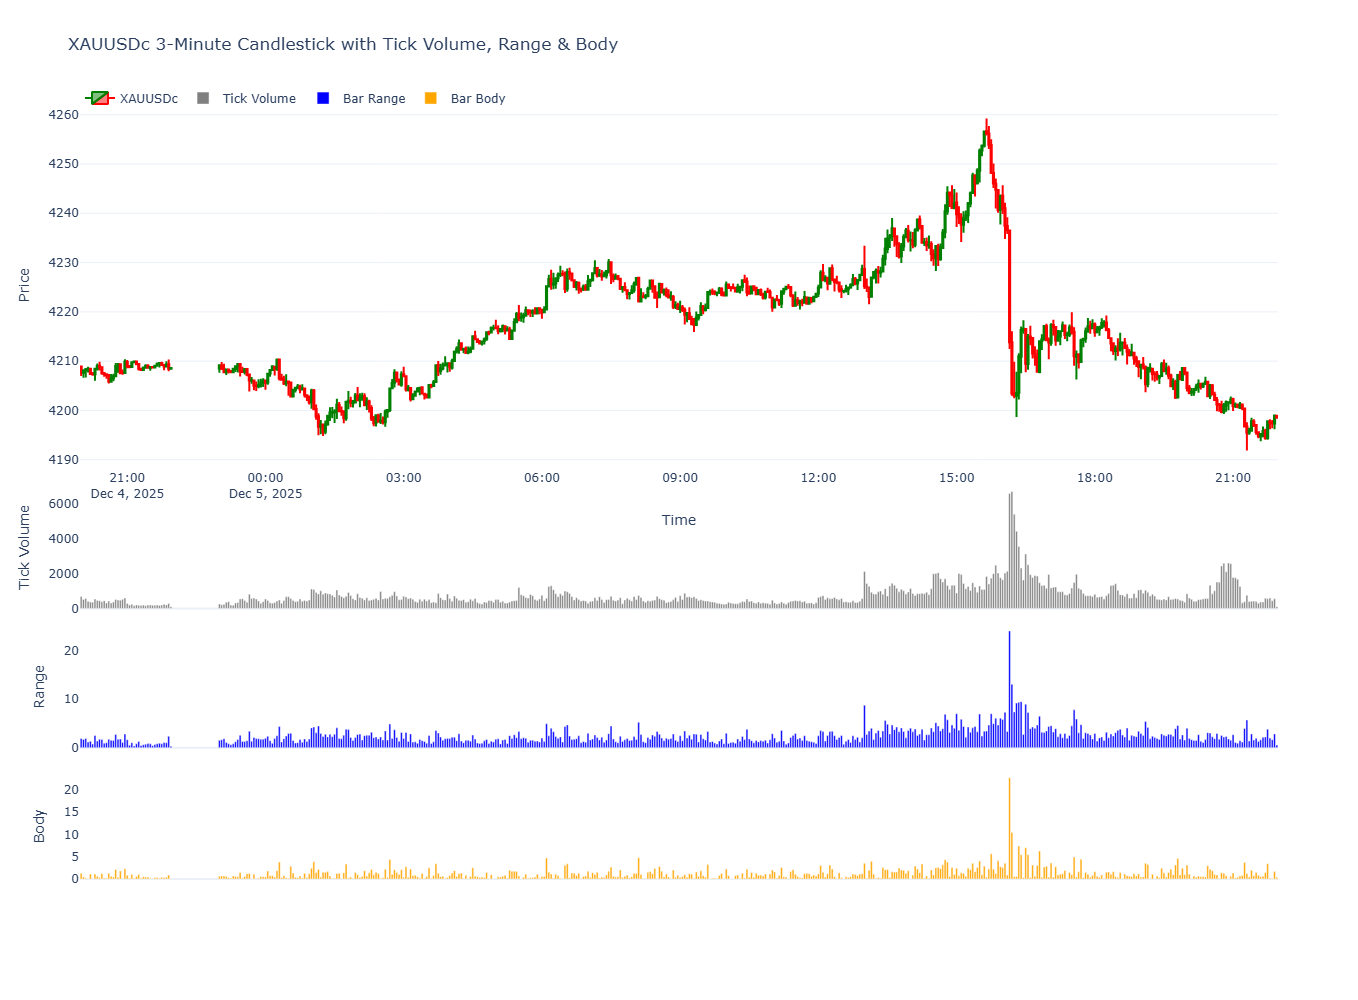

In [5]:
import MetaTrader5 as mt5 
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=5)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

# -------------------------
# 4. Remove non-trading periods (weekends)
# -------------------------
df = df[df.index.dayofweek < 5]

# -------------------------
# 5. Calculate Range and Body per bar
# -------------------------
df['range'] = df['high'] - df['low']
df['body'] = abs(df['close'] - df['open'])

# -------------------------
# 6. Plot 4-pane chart
# -------------------------
fig = go.Figure()

# Candlestick chart (top pane)
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Tick-volume bars (second pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['tick_volume'],
    name='Tick Volume',
    marker_color='gray',
    yaxis='y2'
))

# Range bars (third pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['range'],
    name='Bar Range',
    marker_color='blue',
    yaxis='y3'
))

# Body bars (fourth pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['body'],
    name='Bar Body',
    marker_color='orange',
    yaxis='y4'
))

# Layout with 4 panes
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc 3-Minute Candlestick with Tick Volume, Range & Body',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),
    yaxis=dict(title='Price', domain=[0.55, 1]),
    yaxis2=dict(title='Tick Volume', domain=[0.38, 0.53], showgrid=False),
    yaxis3=dict(title='Range', domain=[0.21, 0.36], showgrid=False),
    yaxis4=dict(title='Body', domain=[0.05, 0.18], showgrid=False),
    legend=dict(orientation='h', y=1.02, x=0),
    height=1000
)

fig.show()


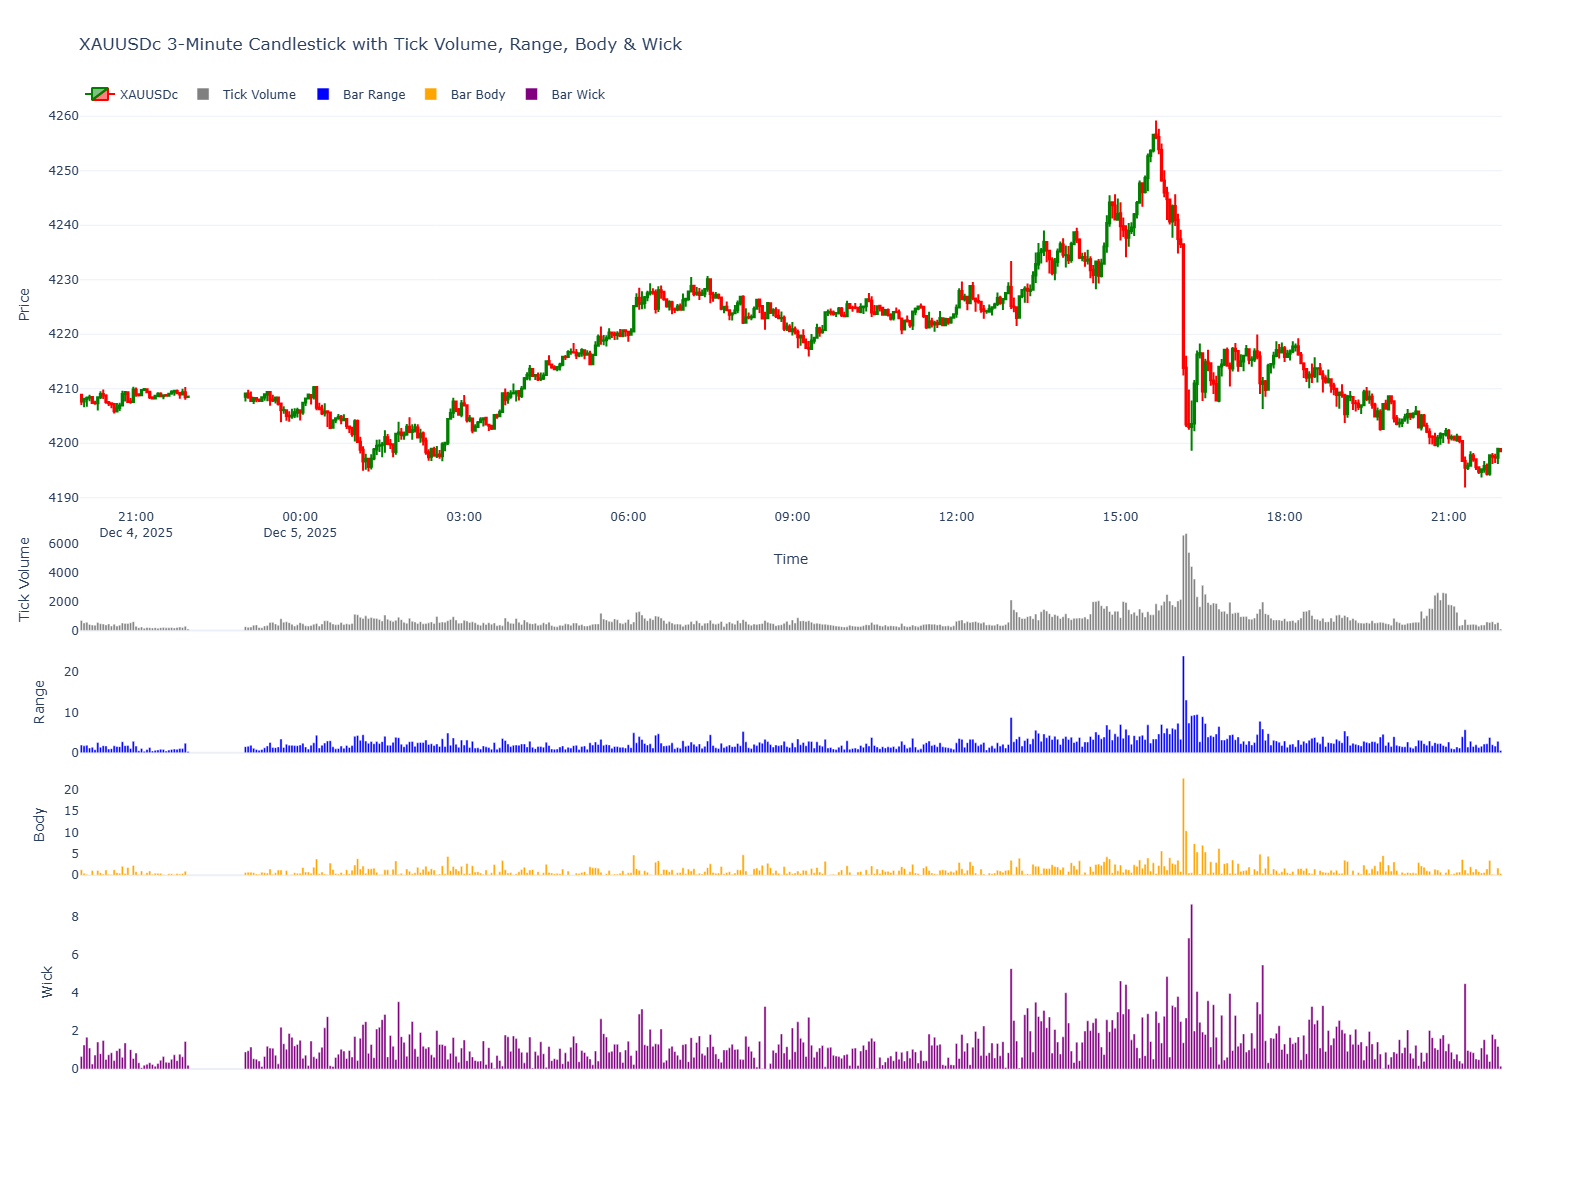

In [6]:
import MetaTrader5 as mt5 
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=5)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

# -------------------------
# 4. Remove non-trading periods (weekends)
# -------------------------
df = df[df.index.dayofweek < 5]

# -------------------------
# 5. Calculate Range, Body, and Wick per bar
# -------------------------
df['range'] = df['high'] - df['low']
df['body'] = abs(df['close'] - df['open'])
df['wick'] = df['range'] - df['body']

# -------------------------
# 6. Plot 5-pane chart
# -------------------------
fig = go.Figure()

# Candlestick chart (top pane)
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Tick-volume bars (second pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['tick_volume'],
    name='Tick Volume',
    marker_color='gray',
    yaxis='y2'
))

# Range bars (third pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['range'],
    name='Bar Range',
    marker_color='blue',
    yaxis='y3'
))

# Body bars (fourth pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['body'],
    name='Bar Body',
    marker_color='orange',
    yaxis='y4'
))

# Wick bars (fifth pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['wick'],
    name='Bar Wick',
    marker_color='purple',
    yaxis='y5'
))

# Layout with 5 panes
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc 3-Minute Candlestick with Tick Volume, Range, Body & Wick',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),
    yaxis=dict(title='Price', domain=[0.6, 1]),
    yaxis2=dict(title='Tick Volume', domain=[0.48, 0.58], showgrid=False),
    yaxis3=dict(title='Range', domain=[0.36, 0.46], showgrid=False),
    yaxis4=dict(title='Body', domain=[0.24, 0.34], showgrid=False),
    yaxis5=dict(title='Wick', domain=[0.05, 0.22], showgrid=False),
    legend=dict(orientation='h', y=1.02, x=0),
    height=1200
)

fig.show()
